In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Análise Inicial do Problema

Observando nosso arquivo inicial "drug200.csv", temos os seguintes parâmetros, que representam colunas nas tabelas:

| Nome na Coluna             | Tipo de Variável             | Variável                                                | Tipo de Dado                                           |
| ---                        | ---                          | ---                                                     | ---                                                    | 
| Age                        | Variável de determinação     | Idade                                                   | int(anos)                                              |
| Sex                        | Variável de determinação     | Sexo                                                    | object (M ou F)                                        |
| BP                         | Variável de determinação     | Pressão sanguínea                                       | object (1:HIGH; 2:NORMAL; 3:LOW)                       |
| Cholesterol                | Variável de determinação     | Nível de Colesterol                                     | object (1:HIGH; 2:NORMAL)                              |
| Na_To_K                    | Variável de determinação     | Razão entre a quantidade de sódio e potássio no sangue  | float                                                  |
| Drug                       | Variável alvo                | Representa o tipo do remédio                            | object (1:DrugX; 2:drugy; 3:drugA; 4: drugB; 5: drugC) | 

Variável de determinação são as variáveis que serão utilizadas para fazer a previsão da variável alvo. Determinamos também o tipo de dado teórico que utilizaremos para manipularmos os dados.

# Importação e checagem dos primeiros dados:

Temos, inicialmente, 200 amostras de dados que serão analisadas nesse primeiro momento. Vamos importar a base de dados para podermos lê-la nesse notebook.

In [71]:
# "importando" (lendo) tabela para o código
dados_drogas_200 = pd.read_csv('drug200.csv', sep=',' )

Tendo importado a tabela, vamos fazer uma análise geral das suas linhas:

In [72]:
dados_drogas_200.info() #checaremos se os dados estão sendo interpretados da forma correta  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Como observado, nossos dados gerados estão na forma correta. Também conseguimos observar a quantidade de linhas de determinada coluna não-nulas. Como nesse primeiro arquivo "drug200" temos 200 linhas (amostras), o número esperado de não-nulos de cada coluna era 200, que de fato está sendo alcançado.

Analisando os dados estatísticos das variáveis numéricas/quantitativas:

In [73]:
dados_drogas_200.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Análise Exploratória dos primeiros dados:


In [74]:
dados_drogas_200.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Vamos explorar inicialmente a divisão, dentre essas 200 amostras, de todas as variáveis

### Divisão entre homens e mulheres

In [75]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=2, cols=3)
fig.add_trace(go.Bar(y= dados_drogas_200['Sex'].value_counts(), x = ['Male', 'Female'], name='Gênero'), row=1, col=1)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()

### Divisão entre as classificação de pressão sanguínea

In [76]:
fig = make_subplots (rows=2, cols=3)
fig.add_trace(go.Bar(y= dados_drogas_200['BP'].value_counts(), x = ['PRESSÃO ALTA', 'PRESSÃO BAIXA', 'PRESSÃO NORMAL'], name='Pressão Sanguínea'), row=1, col=1)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()

### Divisão entre a classificação do colesterol no sangue 

In [77]:
fig = make_subplots (rows=2, cols=3)
fig.add_trace(go.Bar(y= dados_drogas_200['Cholesterol'].value_counts(), x = ['COLESTEROL ALTO', 'COLESTEROL NORMAL'], name='Colesterol no Sangue'), row=1, col=1)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()

### Histograma das Idades:

(array([ 7.,  5., 10., 11.,  5.,  9.,  5.,  7., 11.,  8.,  9., 12.,  4.,
        12., 12.,  6.,  6.,  8.,  8., 11.,  4.,  6., 11.,  3., 10.]),
 array([15.  , 17.36, 19.72, 22.08, 24.44, 26.8 , 29.16, 31.52, 33.88,
        36.24, 38.6 , 40.96, 43.32, 45.68, 48.04, 50.4 , 52.76, 55.12,
        57.48, 59.84, 62.2 , 64.56, 66.92, 69.28, 71.64, 74.  ]),
 <BarContainer object of 25 artists>)

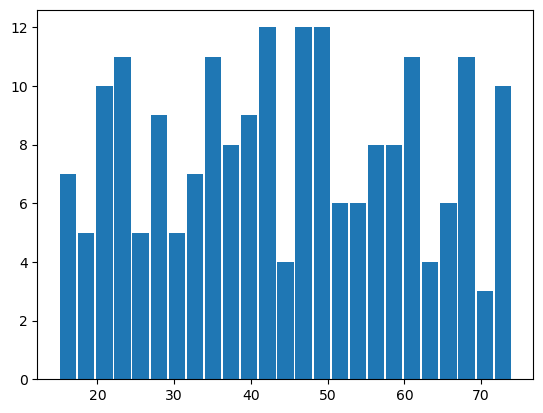

In [78]:
plt.hist(dados_drogas_200['Age'], 25, rwidth=0.9)

### Histograma da razão entre Sódio e Potássio:

(array([ 9., 11., 23., 24., 14., 20., 12., 11.,  9., 12.,  9.,  6.,  3.,
         4.,  4.,  8.,  4.,  3.,  4.,  1.,  2.,  2.,  3.,  0.,  2.]),
 array([ 6.269  ,  7.54812,  8.82724, 10.10636, 11.38548, 12.6646 ,
        13.94372, 15.22284, 16.50196, 17.78108, 19.0602 , 20.33932,
        21.61844, 22.89756, 24.17668, 25.4558 , 26.73492, 28.01404,
        29.29316, 30.57228, 31.8514 , 33.13052, 34.40964, 35.68876,
        36.96788, 38.247  ]),
 <BarContainer object of 25 artists>)

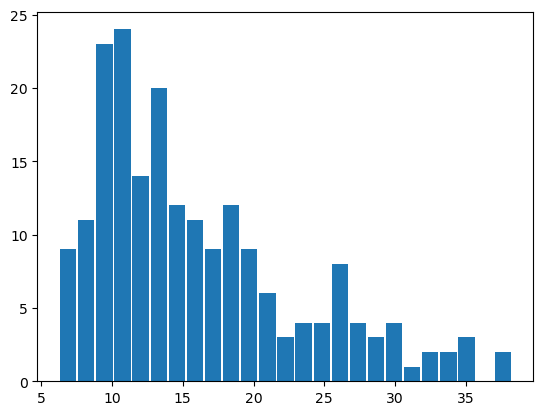

In [79]:
plt.hist(dados_drogas_200['Na_to_K'], 25, rwidth=0.9)

Vamos agora ver características das pessoas para cada droga receitada, de modo a tentar encontrar achar alguma relação entre as drogas e os parâmetros em geral:

### Droga A:

Filtrando o tipo de pressão das pessoas para quais foram receitadas a 'drugA':

(array([ 9., 11., 23., 24., 14., 20., 12., 11.,  9., 12.,  9.,  6.,  3.,
         4.,  4.,  8.,  4.,  3.,  4.,  1.,  2.,  2.,  3.,  0.,  2.]),
 array([ 6.269  ,  7.54812,  8.82724, 10.10636, 11.38548, 12.6646 ,
        13.94372, 15.22284, 16.50196, 17.78108, 19.0602 , 20.33932,
        21.61844, 22.89756, 24.17668, 25.4558 , 26.73492, 28.01404,
        29.29316, 30.57228, 31.8514 , 33.13052, 34.40964, 35.68876,
        36.96788, 38.247  ]),
 <BarContainer object of 25 artists>)

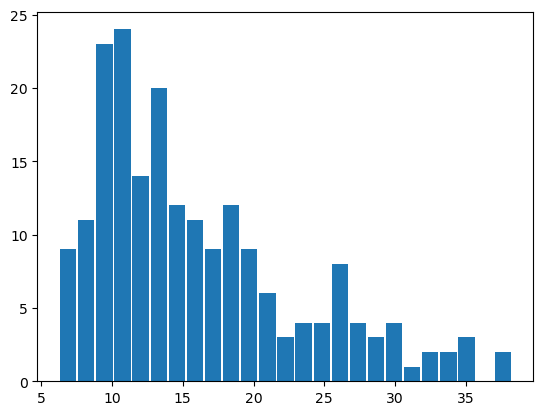

In [92]:
plt.hist(dados_drogas_200['Na_to_K'], 25, rwidth=0.9)

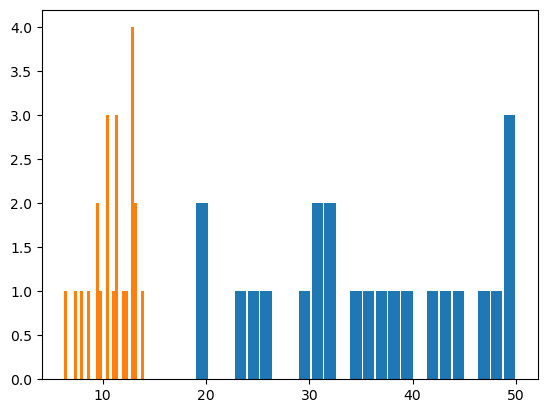

In [90]:
# Filtrando os dados das pessoas que foram receitados a 'drugA'
dados_drugA = dados_drogas_200[dados_drogas_200['Drug'] == 'drugA']
fig = make_subplots(rows=2, cols=3)
fig.add_trace(go.Bar(y=dados_drugA['Cholesterol'].value_counts(), x=['COLESTEROL ALTA', 'COLESTEROL NORMAL'], name='Colesterol'), row=1, col=1)
fig.add_trace(go.Bar(y=dados_drugA['Sex'].value_counts(), x=['MASCULINO', 'FEMININO'], name='Sexo'), row=1, col=1)
fig.add_trace(go.Bar(y=dados_drugA['BP'].value_counts(), x=['PRESSÃO ALTA', 'PRESSÃO BAIXA', 'PRESSÃO NORMAL'], name='Pressão Sanguínea'), row=1, col=1)
plt.hist(dados_drugA['Age'], 25, rwidth=0.9)
plt.hist(dados_drugA['Na_to_K'], 25, rwidth=0.9)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()

Filtrando o tipo de colesterol no sangue das pessoas para quais foram receitadas a 'drugA':

In [85]:
# Filtrando os dados dos colesterois para 'drugA'
dados_drugA = dados_drogas_200[dados_drogas_200['Drug'] == 'drugA']
fig = make_subplots(rows=2, cols=3)
fig.add_trace(go.Bar(y=dados_drugA['Cholesterol'].value_counts(), x=['COLESTEROL ALTA', 'COLESTEROL NORMAL'], name='Colesterol'), row=1, col=1)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()